# Advanced pandas Practice - Nashville City Cemetery

In this exercise, you'll get to explore some additional features of the pandas library for cleaning and summarizing data. This will be done using the Nashville City Cemetery data.

As a reminder, you can get more information about the data that you were working with here: [Nashville City Cemetery Metadata](https://data.nashville.gov/api/views/diwx-fgj7/files/963c111e-2e2a-4133-a807-2becd590feb2?download=true&filename=Historic-Nashville-City-Cemetery-Interments-1846-1979-Metadata-v2.pdf).

**1.** Read the City Cemetery data into a pandas DataFrame. **Hint:** see the [`read_excel` function](https://pandas.pydata.org/docs/reference/api/pandas.read_excel.html).

In [1]:
import pandas as pd
import numpy as np
cemetery_df = pd.read_excel('../data/Historic_Nashville_City_Cemetery_Interments__1846-1979.xlsx')
cemetery_df.head()

,Volume,Name,Burial Month,Month No.,Burial Day,Burial Year,Sex,Race,Age,Residence,Cause of Death/Burial,Ave,Section/Lot,Remarks
0,6B,"Bell, Nancy Ann",Aug,8.0,6.0,1979.0,F,W,10.0,NaN,NaN,Oak,"sec. 28 NW, lot 12",J. L. Hughes lot
1,6W,"Drake, Mary Edith Smith, Mrs.",May,5.0,19.0,1979.0,F,W,67.0,"Madison, Tenn",Cancer,"Locust, Boyd Lot",lot 10,"wife of Alex M. Drake, Madison Funeral Home Of..."
2,6D,"Davis, Bessie",Sep,9.0,19.0,1979.0,F,W,90.0,Nashville,Old Age,Poplar,"McAllister, E25, lot 8",daughter of Helen Davis
3,6C,"Creech, Emily Green",Aug,8.0,NaN,1978.0,F,W,91.0,Nashville,NaN,sect.ion 9,15,Magnolia
4,6W,"Creech, Emily Green",Aug,8.0,NaN,1978.0,F,W,91.0,"Nashville, Tennessee",NaN,NaN,NaN,Malgnolia


**2. Most Common Causes of Death.**  
   a. Find the 10 most common (known) recorded causes of death.  
   b. Clean up some of the misspellings. Use the [`replace` method](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.replace.html) to clean up some of the causes of death. For example, replace "Cholrea" with "Cholera" and "Still Born" with "Stillborn".   
   **Bonus (Save For Last):** One method of detecting and correcting misspellings is fuzzy matching using metrics like [Levenshtein distance](https://en.wikipedia.org/wiki/Levenshtein_distance). Check out [thefuzz](https://github.com/seatgeek/thefuzz) a library that implements fuzzy matching and apply it to detect and correct misspellings.  
   c. After correcting the spellings, find the 10 most common causes of death and create a bar chart to display your findings.  

In [2]:
cause_of_death = cemetery_df['Cause of Death/Burial'].value_counts()
cause_of_death.head(10)

Cause of Death/Burial
Consumption     1767
Unknown         1260
Still Born       841
Cholrea          667
Not Known        639
Old Age          604
Cholera          575
Pneumonia        516
Flux             469
Complication     446
Name: count, dtype: int64

In [3]:
cemetery_df['Cause of Death/Burial (Clean)'] = cemetery_df['Cause of Death/Burial'].replace(['Cholrea','Cholera Infantum','Cholera Morbus','Cholrea Morbus','Cholera Inphantum','Cholrea Infantum'],'Cholera').replace(['Still Born','Stil Born','Stilborn','Still Bornd','Still born','Still Borned','Still BOrn'],'Stillborn')
cause_of_death_clean = cemetery_df['Cause of Death/Burial (Clean)'].value_counts()
cause_of_death_clean.head(10)

Cause of Death/Burial (Clean)
Consumption     1767
Cholera         1356
Stillborn       1300
Unknown         1260
Not Known        639
Old Age          604
Pneumonia        516
Flux             469
Complication     446
Cold             421
Name: count, dtype: int64

3. Create a line chart showing the number of burials per year.

<Axes: xlabel='Burial Year'>

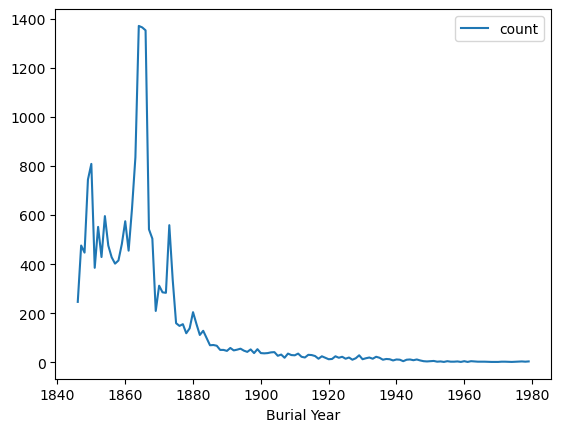

In [4]:
burials_per_year = cemetery_df['Burial Year'].value_counts()
burials_per_year_df = pd.DataFrame(data=burials_per_year).sort_index()
burials_per_year_df.plot()

4. **Burials per Month and Year**  
    a. Use the [crosstab function](https://pandas.pydata.org/docs/reference/api/pandas.crosstab.html) to build a summary table showing the number of burials per year per month. You should have one row per year and one column for month.  
    b. After creating this summary table, make sure that the year labels are integers (no decimal part) and that the columns are sorted correctly.  
    c. Filter your table to show only the years 1846 through 1860.  
    **Bonus** Display your table so that highlights any months that had over 100 burials. Hint: Look at styling in pandas: https://pandas.pydata.org/pandas-docs/version/1.0/user_guide/style.html  
    d. Go back to your original DataFrame and filter to the year and month that had the largest number of burials. What are the most common causes of death for that month?

In [5]:
burials_1846_to_1860 = cemetery_df[cemetery_df['Burial Year']<=1860]
pd.crosstab(burials_1846_to_1860['Burial Year'].dropna().astype('int32'),burials_1846_to_1860['Month No.'])

Month No.,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0
Burial Year,,,,,,,,,,,,
1846,20,26,25,22,26,0,0,0,35,39,23,30
1847,43,34,38,35,26,47,40,61,35,47,36,34
1848,36,36,49,37,41,47,65,39,23,26,21,27
1849,46,64,64,43,62,231,96,36,28,18,24,33
1850,24,26,43,29,37,120,370,52,22,27,28,31
1851,26,31,27,29,26,37,49,35,32,42,14,37
1852,37,32,39,37,58,84,76,54,31,32,36,36
1853,35,39,35,31,36,54,47,32,34,27,28,31
1854,35,33,34,43,61,137,95,44,34,25,25,30


5. **Burials per Decade**  
    a. Create a "Decade" column to show the decade in which a burial occurred.    
    b. Examine the burials per decade. Look at the total number of burials and the proportion (aka percentage) of male burials and female burials.  
    c. Create a clustered bar chart to show how male and female burials have changed over time.

<Axes: xlabel='Decade,Sex_Clean'>

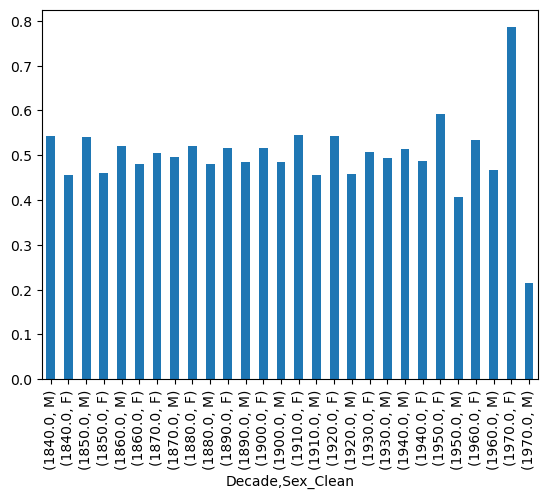

In [8]:
cemetery_df['Decade'] = np.floor(cemetery_df['Burial Year']/10)*10
cemetery_df['Sex_Clean'] = cemetery_df['Sex'].replace(['Boy','m'],'M').replace(['G','W','FF'],'F')
burials_per_decade = cemetery_df.filter(items=['Decade','Sex_Clean']).where(cemetery_df['Sex_Clean'].isin(['M','F']))
burials_per_decade.groupby('Decade')['Sex_Clean'].value_counts(normalize=True).plot(kind='bar')
